# The Winton Stock Market Challenge Kaggle competition

# Three-File Descriptions (offered by the competition)
train.csv - the training set, including the columns of:

Feature_1 - Feature_25
Ret_MinusTwo, Ret_MinusOne
Ret_2 - Ret_120
Ret_121 - Ret_180: target variables
Ret_PlusOne, Ret_PlusTwo: target variables
Weight_Intraday, Weight_Daily

test.csv - the test set, including the columns of:

Feature_1 - Feature_25
Ret_MinusTwo, Ret_MinusOne
Ret_2 - Ret_120

sample_submission.csv - a sample submission file in the correct format

Weights are not revealed during the competition.
Already the train file has the solution.

# Data Fields
Feature_1 to Feature_25: different features relevant to prediction

Ret_MinusTwo: this is the return from the close of trading on day D-2 to the close of trading on day D-1 (i.e. 1 day)

Ret_MinusOne: this is the return from the close of trading on day D-1 to the point at which the intraday returns start on day D (approximately 1/2 day)

Ret_2 to Ret_120: these are returns over approximately one minute on day D. Ret_2 is the return between t=1 and t=2.

Ret_121 to Ret_180: intraday returns over approximately one minute on day D. These are the target variables you need to predict as {id}_{1-60}.

Ret_PlusOne: this is the return from the time Ret_180 is measured on day D to the close of trading on day D+1. (approximately 1 day). This is a target variable you need to predict as {id}_61.

Ret_PlusTwo: this is the return from the close of trading on day D+1 to the close of trading on day D+2 (i.e. 1 day) This is a target variable you need to predict as {id}_62.

Weight_Intraday: weight used to evaluate intraday return predictions Ret 121 to 180

Weight_Daily: weight used to evaluate daily return predictions (Ret_PlusOne and Ret_PlusTwo).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data Representation in Scikit-Learn

In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV

# Machine Learning: Data Representation in Scikit-Learn

In [3]:
data31=pd.read_csv('train.csv')
#read raw data which is already trained (the competition was ended long time ago.)

# Data as table: A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements

In [4]:
data31.head(15)
#NaN is a missing variable
#Feature1 looks having lots of missings
#some feature data are missed from the initial data
#return data looks filled well from the initial data

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06
5,6,NaN,NaN,-0.680515,NaN,1.0,0.227034,24099,0.2064,8.0,...,0.000242,0.001412,0.001880,-9.458593e-04,0.000471,0.001193,0.031098,-0.006551,1.431110e+06,1.788888e+06
6,7,NaN,-0.230636,-0.227021,-0.084126,7.0,-0.095007,39351,0.3650,13.0,...,0.000326,-0.000408,0.000086,-1.192267e-05,-0.000006,0.000640,-0.011105,-0.030745,1.719166e+06,2.148958e+06
7,8,NaN,2.582955,0.157344,0.617261,8.0,-0.177333,92214,0.2119,8.0,...,-0.000247,-0.000250,0.000010,1.620296e-05,0.000245,0.000006,0.020268,-0.059093,1.349917e+06,1.687396e+06
8,9,NaN,-0.187950,-0.259820,0.047637,8.0,-0.381621,18418,0.3583,8.0,...,0.000008,-0.000017,-0.000007,-3.834451e-04,-0.000929,0.000184,-0.009348,-0.024755,1.536680e+06,1.920849e+06
9,10,NaN,2.883570,0.813783,0.796746,7.0,0.021982,47637,0.2654,6.0,...,-0.002510,0.000640,0.000623,6.077426e-04,-0.001252,-0.000597,0.022407,-0.010674,1.370804e+06,1.713505e+06


In [12]:
data31["Ret_PlusOne"].describe()
#return one as the solution was mean value close to 0 (this cannot be real data so the competition file is...)
#max was 0.79 so volatility may have some...

count    40000.000000
mean        -0.000210
std          0.025039
min         -0.627690
25%         -0.010521
50%         -0.000258
75%          0.010005
max          0.795602
Name: Ret_PlusOne, dtype: float64

In [13]:
data31["Ret_PlusTwo"].describe()
#also mean value is close to 0
#but max was 0.30. different from return plus one.

count    40000.000000
mean         0.000012
std          0.024160
min         -0.450779
25%         -0.010055
50%         -0.000258
75%          0.009772
max          0.303038
Name: Ret_PlusTwo, dtype: float64

In [6]:
data31.filter(like='Feature').head()
#not every feature among 25 feature columns is needed to be used.

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,...,1.0,NaN,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,...,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462
2,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.0,...,1.0,-1.132426,1.799813,-1.603488,3.0,NaN,0.389061,1.728096,-1.798090,-1.019370
3,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.0,...,1.0,-1.131213,1.565036,NaN,7.0,1.148738,-2.440799,1.551425,-1.788725,NaN
4,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.0,...,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820


In [7]:
data31.filter(like='Feature_1').head()
#11-15 features were very different. negative, fractional, integer, feature15 starting from 27...
#when returns as target variables have max, less than 1. 
#Obviously, 1,5,7,9,10,13,15,16,17 cannot be candidating. 
#Lots of competition solutions have correlation checks with those columns;;;
#in a same vein, Feature 2,3,4,8,12,14,19 are strong candidates for correlation checks.

,Feature_1,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19
0,NaN,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463
1,NaN,NaN,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067
2,NaN,5.0,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488
3,NaN,5.0,-2.138383,0.00,6.0,NaN,1.801865,1.0,-1.131213,1.565036,NaN
4,6.0,4.0,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189


In [8]:
data31.filter(like='Ret').head()
#checking return columns again.

,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,...,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo
0,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,...,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846
1,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,...,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253
2,0.003077,0.006181,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,...,0.000255,0.000278,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711
3,0.000984,0.014106,0.000277,-0.000088,-0.000199,-0.000301,0.000711,-0.000431,-0.000144,0.000340,...,-0.000161,-0.000155,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190
4,-0.018224,0.011065,-0.001232,0.000002,-0.001205,-0.000021,0.000005,0.000623,-0.001843,0.000005,...,-0.000005,-0.000007,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552


In [10]:
data31.filter(like='Weight').head()
#those are not revealed at the competition. If known, features having minmax 3 are easily removed.

,Weight_Intraday,Weight_Daily
0,1.251508e+06,1.564385e+06
1,1.733950e+06,2.167438e+06
2,1.529197e+06,1.911497e+06
3,1.711569e+06,2.139462e+06
4,1.267270e+06,1.584088e+06


In [14]:
data31.columns

Index(['Id', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       ...
       'Ret_175', 'Ret_176', 'Ret_177', 'Ret_178', 'Ret_179', 'Ret_180',
       'Ret_PlusOne', 'Ret_PlusTwo', 'Weight_Intraday', 'Weight_Daily'],
      dtype='object', length=211)

In [15]:
len(data31.columns)
#25+2+180(+-1)+2+2 = approximately 210 : it seems ok for given information of law data description
# there is a column named as 'Id': integer starting from 1

211

In [16]:
data31.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 211 entries, Id to Weight_Daily
dtypes: float64(209), int64(2)
memory usage: 64.4 MB


In [17]:
#data31.dtype()

# Data Cleaning

In [41]:
#Among features, big deviated columns ought to be removed before correlation checks
data311 = data31.drop('Id', axis=1)
data31a = data311.drop('Feature_1', axis=1)
data31b = data31a.drop('Feature_5', axis=1)
data31c = data31b.drop('Feature_6', axis=1)
data31d = data31c.drop('Feature_7', axis=1)
data31e = data31d.drop('Feature_9', axis=1)
data31f = data31e.drop('Feature_10', axis=1)
data31g = data31f.drop('Feature_11', axis=1)
data31h = data31g.drop('Feature_13', axis=1)
data31aa = data31h.drop('Feature_15', axis=1)
data31bb = data31aa.drop('Feature_16', axis=1)
data31cc = data31bb.drop('Feature_17', axis=1)
data31dd = data31cc.drop('Feature_18', axis=1)
data31ee = data31dd.drop('Feature_20', axis=1)
data31ff = data31ee.drop('Feature_21', axis=1)
data31gg = data31ff.drop('Feature_23', axis=1)
data31h = data31gg.drop('Feature_24', axis=1)
data31aaa = data31h.drop('Feature_25', axis=1)

data31aaa.head()

,Feature_2,Feature_3,Feature_4,Feature_8,Feature_12,Feature_14,Feature_19,Feature_22,Ret_MinusTwo,Ret_MinusOne,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,NaN,NaN,NaN,0.2254,0.49,1.842984,-0.925463,-0.489492,0.055275,-0.010770,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,NaN,NaN,NaN,0.0166,0.71,1.577586,-0.897067,-0.151805,0.009748,0.002987,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,-0.696727,0.739591,-0.167928,0.3650,0.03,1.871160,-1.603488,0.389061,0.003077,0.006181,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,-0.694350,1.568248,0.479073,0.2654,0.00,NaN,NaN,-2.440799,0.000984,0.014106,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,-1.736489,2.765531,1.245280,0.2138,0.97,0.842102,-1.102189,1.732708,-0.018224,0.011065,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [19]:
#data31.describe(): do not need. all are int.

In [42]:
data31aaa.describe()
#minmax more than absolute value 1, should be cleaned.

,Feature_2,Feature_3,Feature_4,Feature_8,Feature_12,Feature_14,Feature_19,Feature_22,Ret_MinusTwo,Ret_MinusOne,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
count,30854.000000,38763.000000,32279.000000,39531.000000,38904.000000,39272.000000,38810.000000,38655.000000,40000.000000,40000.000000,...,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04
mean,-0.117558,0.558392,0.405572,0.196958,0.498508,1.588524,-1.205438,-0.773089,0.000784,-0.000803,...,0.000049,-3.580980e-06,-9.675766e-06,-1.268935e-05,-0.000017,-0.000057,-0.000210,0.000012,1.504600e+06,1.880750e+06
std,1.236250,0.902233,0.799082,0.138485,0.351855,0.316907,0.642426,1.389229,0.028279,0.030569,...,0.001115,1.166019e-03,1.248956e-03,1.217967e-03,0.001208,0.001270,0.025039,0.024160,2.059143e+05,2.573928e+05
min,-3.440521,-4.643526,-5.440596,0.009800,0.000000,-0.149272,-3.292909,-5.819912,-0.536283,-0.514720,...,-0.018048,-1.786752e-02,-3.526027e-02,-4.864099e-02,-0.037215,-0.058046,-0.627690,-0.450779,1.000035e+06,1.250044e+06
25%,-0.967186,-0.110192,-0.111696,0.016600,0.140000,1.415236,-1.619718,-1.787615,-0.010687,-0.010830,...,-0.000316,-3.943210e-04,-4.091851e-04,-3.649676e-04,-0.000361,-0.000413,-0.010521,-0.010055,1.357070e+06,1.696337e+06
50%,-0.389162,0.437228,0.403516,0.213800,0.500000,1.611754,-1.169327,-0.699112,0.000112,-0.000665,...,0.000004,-4.039616e-07,4.016833e-07,6.407432e-07,0.000001,-0.000002,-0.000258,-0.000258,1.477713e+06,1.847142e+06
75%,0.414442,1.064754,0.945944,0.331800,0.850000,1.782934,-0.735786,0.282958,0.010987,0.008976,...,0.000407,3.820685e-04,4.172179e-04,3.750965e-04,0.000378,0.000364,0.010005,0.009772,1.624389e+06,2.030486e+06
max,4.175150,4.530405,2.953163,0.365000,1.000000,3.161848,0.898236,2.284991,0.894024,0.852139,...,0.020781,3.061460e-02,4.406460e-02,2.922928e-02,0.048221,0.026112,0.795602,0.303038,2.761229e+06,3.451536e+06


In [44]:
data31i = data31aaa.drop('Feature_4', axis=1)
data31j = data31i.drop('Feature_8', axis=1)
data31k = data31j.drop('Feature_14', axis=1)
data31l = data31k.drop('Feature_19', axis=1)
data31m = data31l.drop('Feature_22', axis=1)
data31m.head()

,Feature_2,Feature_3,Feature_12,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,NaN,NaN,0.49,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,NaN,NaN,0.71,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,-0.696727,0.739591,0.03,0.003077,0.006181,-0.000782,-0.000402,0.000807,0.000400,0.000656,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,-0.694350,1.568248,0.00,0.000984,0.014106,0.000277,-0.000088,-0.000199,-0.000301,0.000711,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,-1.736489,2.765531,0.97,-0.018224,0.011065,-0.001232,0.000002,-0.001205,-0.000021,0.000005,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [47]:
import matplotlib.pyplot as mp
data31m.corr()

,Feature_2,Feature_3,Feature_12,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
Feature_2,1.000000,-0.173150,0.004868,0.003842,-0.000775,0.015963,-0.004718,0.002066,-0.007182,0.002246,...,0.001943,0.003079,-0.000388,0.005518,-0.004258,0.000485,0.003086,0.000042,0.000216,0.000216
Feature_3,-0.173150,1.000000,-0.003589,-0.003901,0.007365,-0.004798,0.002351,0.011215,0.003172,0.005478,...,0.005013,0.004841,-0.008305,-0.004522,0.005207,0.012555,0.012268,-0.000174,-0.119060,-0.119060
Feature_12,0.004868,-0.003589,1.000000,0.008943,-0.007699,-0.001582,0.011270,0.006369,-0.002758,-0.004542,...,-0.003107,0.000225,0.008582,0.002297,-0.000934,0.002085,-0.004329,-0.013654,0.009248,0.009248
Ret_MinusTwo,0.003842,-0.003901,0.008943,1.000000,0.041609,0.038405,0.035190,-0.013437,-0.035926,0.020158,...,0.017145,0.010319,-0.026430,-0.078411,-0.028541,-0.070963,-0.006067,-0.027418,-0.044301,-0.044301
Ret_MinusOne,-0.000775,0.007365,-0.007699,0.041609,1.000000,0.005129,0.038916,0.039801,-0.025120,0.009441,...,-0.004256,0.041816,0.033211,0.014037,0.017874,-0.020617,-0.013951,-0.016249,0.018216,0.018216
Ret_2,0.015963,-0.004798,-0.001582,0.038405,0.005129,1.000000,-0.007016,-0.014996,-0.033771,0.019540,...,0.011818,0.041862,0.031741,-0.036649,0.011455,0.021367,-0.023150,-0.054775,-0.017258,-0.017258
Ret_3,-0.004718,0.002351,0.011270,0.035190,0.038916,-0.007016,1.000000,-0.108378,-0.013393,0.019082,...,0.028846,-0.004600,0.069670,0.014736,0.056794,-0.008930,-0.022867,-0.073488,0.016775,0.016775
Ret_4,0.002066,0.011215,0.006369,-0.013437,0.039801,-0.014996,-0.108378,1.000000,-0.103540,-0.095004,...,-0.044849,-0.000167,-0.029854,-0.039175,-0.096072,0.031268,-0.039757,0.039193,0.010895,0.010895
Ret_5,-0.007182,0.003172,-0.002758,-0.035926,-0.025120,-0.033771,-0.013393,-0.103540,1.000000,-0.101119,...,0.023417,-0.003310,-0.007030,0.018734,-0.018239,0.006920,0.029388,-0.018634,0.008072,0.008072
Ret_6,0.002246,0.005478,-0.004542,0.020158,0.009441,0.019540,0.019082,-0.095004,-0.101119,1.000000,...,0.011827,-0.001725,-0.008377,0.003377,0.078423,-0.074389,0.004966,-0.005928,0.004765,0.004765


In [51]:
data31_fill=data31m.fillna(0)

In [53]:
data31_fill.corr()

,Feature_2,Feature_3,Feature_12,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
Feature_2,1.000000,-0.147776,0.005764,0.003246,-0.000129,0.014143,-0.004196,0.001631,-0.006179,0.002383,...,0.001530,0.002822,0.000013,0.005115,-0.003601,0.000186,0.002747,-0.000306,0.001405,0.001405
Feature_3,-0.147776,1.000000,-0.003076,-0.003759,0.006571,-0.005464,0.003188,0.010553,0.002882,0.003247,...,0.004578,0.004135,-0.008532,-0.005001,0.003974,0.013229,0.010339,-0.000848,-0.114971,-0.114971
Feature_12,0.005764,-0.003076,1.000000,0.007498,-0.007372,-0.001338,0.010533,0.004394,-0.002145,-0.005294,...,-0.001085,-0.001006,0.008575,0.001773,-0.001928,0.002016,-0.003080,-0.013537,0.009613,0.009613
Ret_MinusTwo,0.003246,-0.003759,0.007498,1.000000,0.041609,0.038094,0.034889,-0.013322,-0.035606,0.019932,...,0.017145,0.010319,-0.026430,-0.078411,-0.028541,-0.070963,-0.006067,-0.027418,-0.044301,-0.044301
Ret_MinusOne,-0.000129,0.006571,-0.007372,0.041609,1.000000,0.005104,0.038671,0.039617,-0.024965,0.009392,...,-0.004256,0.041816,0.033211,0.014037,0.017874,-0.020617,-0.013951,-0.016249,0.018216,0.018216
Ret_2,0.014143,-0.005464,-0.001338,0.038094,0.005104,1.000000,-0.006907,-0.014758,-0.033239,0.019149,...,0.011660,0.041422,0.031401,-0.036221,0.011322,0.021074,-0.022896,-0.054261,-0.017016,-0.017016
Ret_3,-0.004196,0.003188,0.010533,0.034889,0.038671,-0.006907,1.000000,-0.106725,-0.013155,0.018766,...,0.028367,-0.004544,0.068999,0.014586,0.056242,-0.008805,-0.022631,-0.072665,0.016581,0.016581
Ret_4,0.001631,0.010553,0.004394,-0.013322,0.039617,-0.014758,-0.106725,1.000000,-0.102117,-0.093385,...,-0.044398,-0.000167,-0.029564,-0.038797,-0.095018,0.030965,-0.039327,0.038788,0.010784,0.010784
Ret_5,-0.006179,0.002882,-0.002145,-0.035606,-0.024965,-0.033239,-0.013155,-0.102117,1.000000,-0.099599,...,0.023148,-0.003281,-0.006959,0.018551,-0.018045,0.006837,0.029033,-0.018460,0.008019,0.008019
Ret_6,0.002383,0.003247,-0.005294,0.019932,0.009392,0.019149,0.018766,-0.093385,-0.099599,1.000000,...,0.011653,-0.001700,-0.008295,0.003367,0.077186,-0.073536,0.004914,-0.005862,0.005073,0.005073


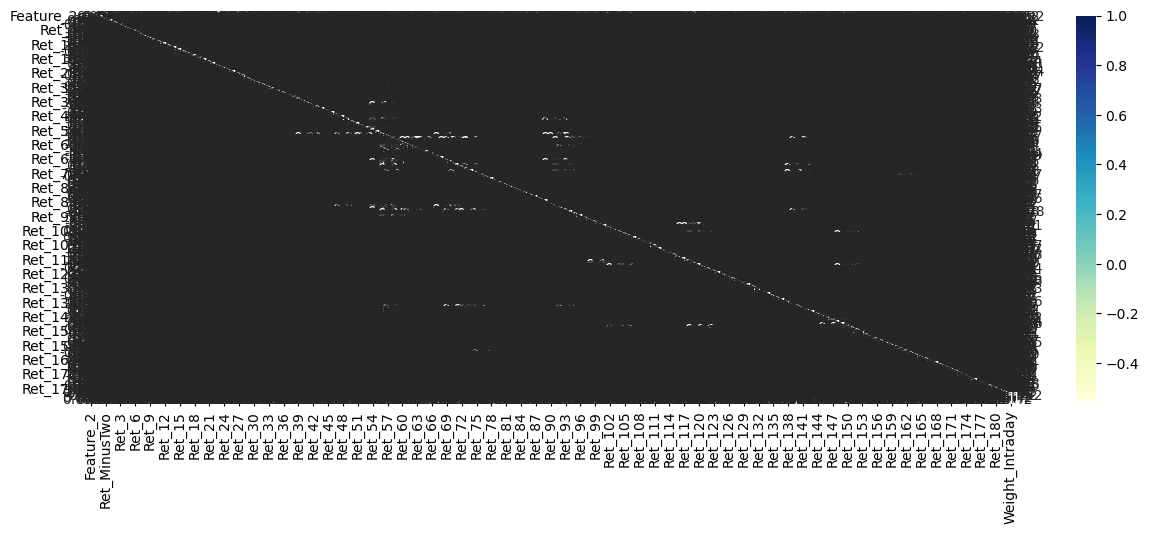

In [48]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
dataplot = sb.heatmap(data31_fill.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Supervised learning example: Simple linear regression

In [54]:
import matplotlib.pyplot as plt
X = data31_fill[['Ret_180','Feature_2','Feature_3','Feature_12']]
y = data31_fill['Ret_PlusOne']

# 1. Choose a class of model

In [55]:
from sklearn.linear_model import LinearRegression

# 2. Choose model hyperparameters. Would we like to fit for the offset (i.e., y-intercept)?

In [56]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

# 3. Arrange data into a features matrix and target vector

In [57]:
X.shape

(40000, 4)

In [58]:
y.shape

(40000,)

# 3.A generate regression dataset

In [59]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)

In [60]:
model.fit(X, y)

LinearRegression()

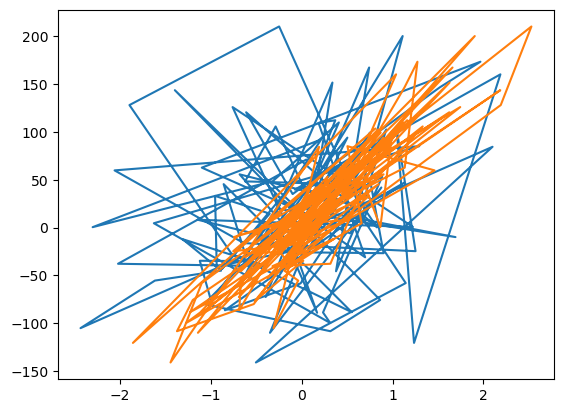

In [61]:
plt.plot(X, y)

In [62]:
model.coef_

array([32.25850999, 86.42024677])

In [63]:
model.intercept_

0.007303861711072557

In [73]:
# new instances where we do not know the answer
Xfit, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
# make a prediction
yfit = model.predict(Xfit)
# show the inputs and predicted outputs
for i in range(1, 3):
 print("X=%s, Predicted=%s" % (Xfit[i], yfit[i]))

X=[-0.61175641  1.62434536], Predicted=120.649280643451
X=[-2.3015387   0.86540763], Predicted=0.5518357031231957


In [74]:
yfit = model.predict(Xfit)

In [75]:
Xfit.shape

(3, 2)

In [76]:
yfit.shape

(3,)

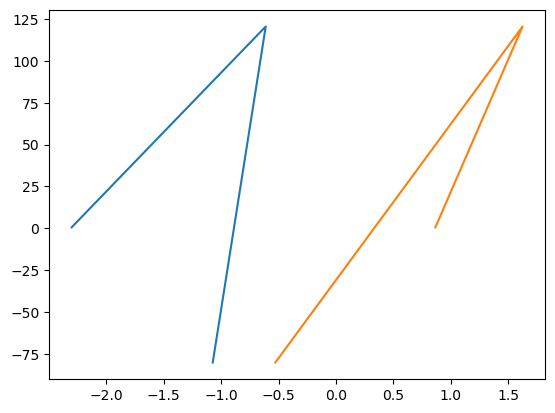

In [77]:

#plt.scatter(X, y)
plt.plot(Xfit, yfit)